In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
sns.mpl.rc("figure", figsize=(16, 6))

In [2]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [3]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [4]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [5]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


In [6]:
gross_data['T_gross_p_gross']=gross_data['weekly_gross'].values/gross_data['potential_gross'].values

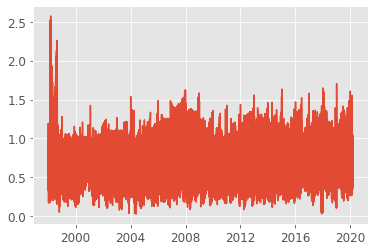

In [7]:
g_data = gross_data[gross_data['year']>='1998']
plt.plot(g_data['week_ending'],g_data['T_gross_p_gross'])

In [8]:
df = g_data[['T_gross_p_gross','week_ending','year','month']]
df2 = df.groupby(['month','year']).mean().reset_index()
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','T_gross_p_gross']]
df3.set_index(['date'], inplace = True)
df3

,T_gross_p_gross
date,
1998-01-01,0.707908
1999-01-01,0.711938
2000-01-01,0.662919
2001-01-01,0.696031
2002-01-01,0.735762
...,...
2015-12-01,0.636932
2016-12-01,0.740009
2017-12-01,0.846271


In [9]:
y = df3.T_gross_p_gross
y = y.asfreq("MS")
y

date
1998-01-01    0.707908
1998-02-01    0.677582
1998-03-01    0.713061
1998-04-01    0.702132
1998-05-01    0.682130
                ...   
2019-11-01    0.732100
2019-12-01    0.888431
2020-01-01    0.852367
2020-02-01    0.822883
2020-03-01    0.719183
Freq: MS, Name: T_gross_p_gross, Length: 267, dtype: float64

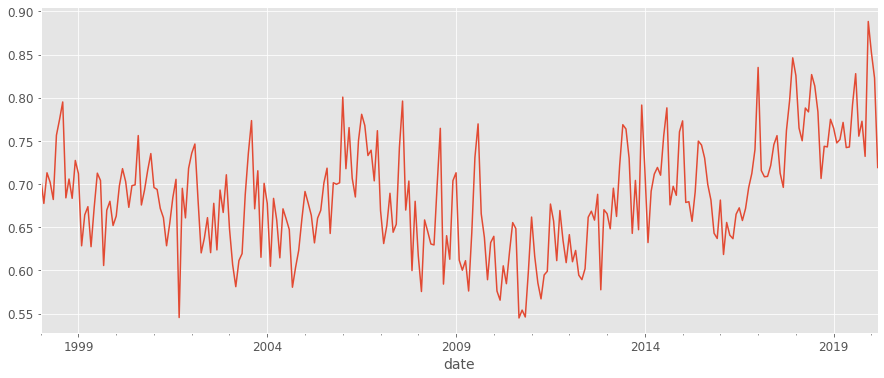

In [10]:
y.plot(figsize=(15, 6))
plt.show()

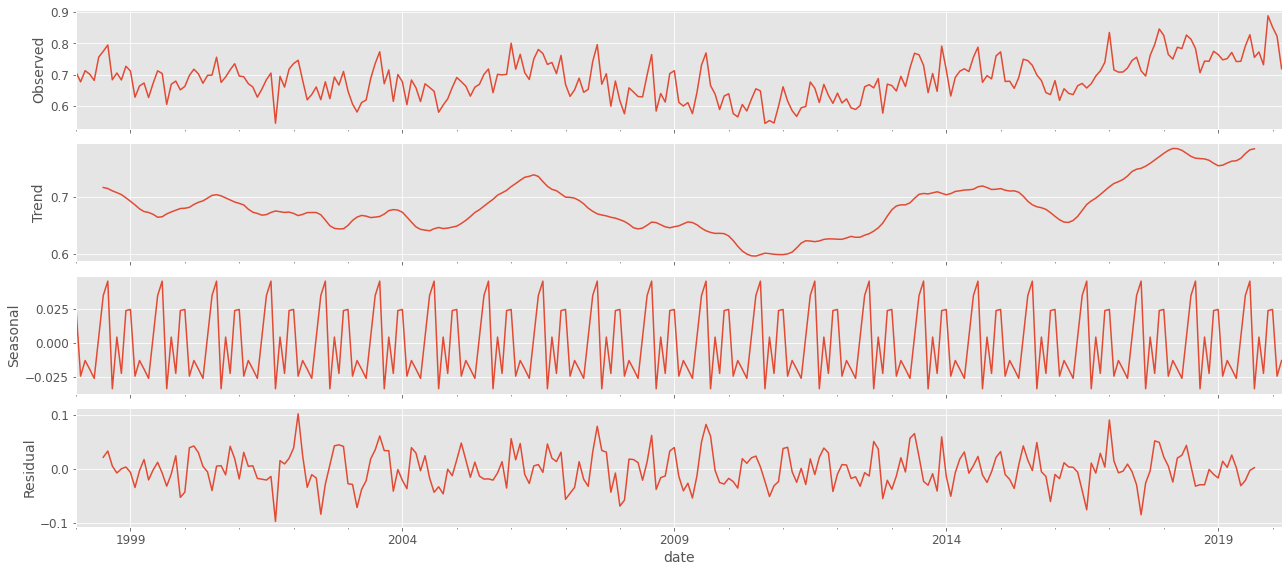

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:558.4803412085267
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:243.55464237884803
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-702.5545787932323
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-705.3748539553072
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-704.3784563652591
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-739.883914483326
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-695.5331783442612
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-700.436052453064
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:234.84672786161445
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-51.46248190417743
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-799.5022428520789
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-798.7694003873496
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-804.5563336150765
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-837.9043279262346
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-786.9782710534571
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-798.4890459591702
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-811.1227119943796
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-819.523004694

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-893.8314910798472
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-793.0159908930643
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-841.1480827190223
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-857.5852973985313
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-848.3204378859336
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-799.7903902790272
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-869.3054075345948
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-876.490921060479
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-910.9602294611086
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-810.9071388108864
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-867.2847218356235
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-813.2183394447095
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-819.5140666931766
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-841.2690130999649
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-878.0177394884787
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-855.7939162527352
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-921.1222885944557
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-834.3446422

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-836.2715184358452
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-882.7700763868114
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-874.636384927789
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-921.8623002421275
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-833.8326753230972
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-874.179036292041
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-835.1079656527536
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-835.7796803946512
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-798.7247797729503
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-864.7220679194395
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-865.6058489341892
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-905.8900741806758
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-804.5200715515833


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-854.8548637521171
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-873.9500747799552
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-867.8068580217533
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-826.223710489865
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-883.5270538204625
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-893.6081956247143
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-926.4301638377017
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-825.9394595779244
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-874.5395186137866


AIC: Akaike Information Critera-An estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. 

AIC = $2k-2Ln(\hat{L})$

k=number of estimated parameters in the model

$\hat{L}$=maxiumum likelihood function of the model

In [14]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4744      0.087      5.455      0.000       0.304       0.645
ma.L1         -0.8526      0.059    -14.569      0.000      -0.967      -0.738
ar.S.L12      -0.4202      0.059     -7.138      0.000      -0.536      -0.305
sigma2         0.0018      0.000     11.282      0.000       0.002       0.002


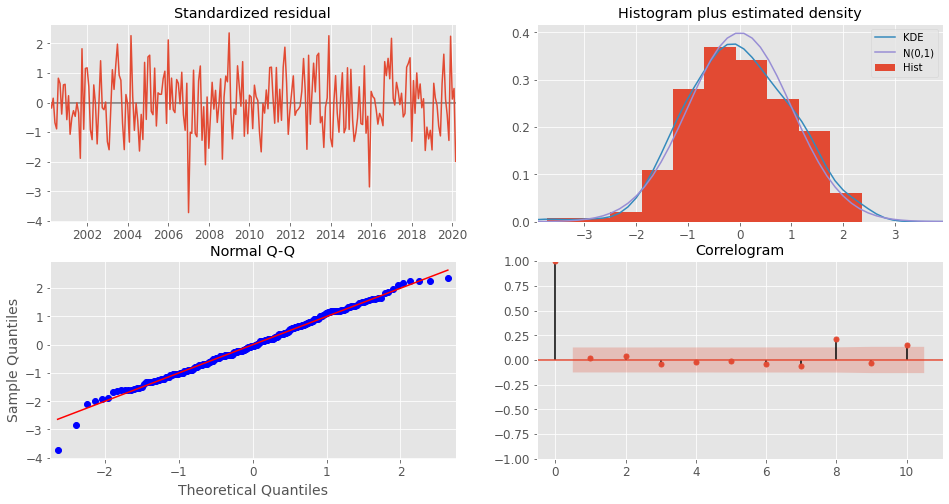

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

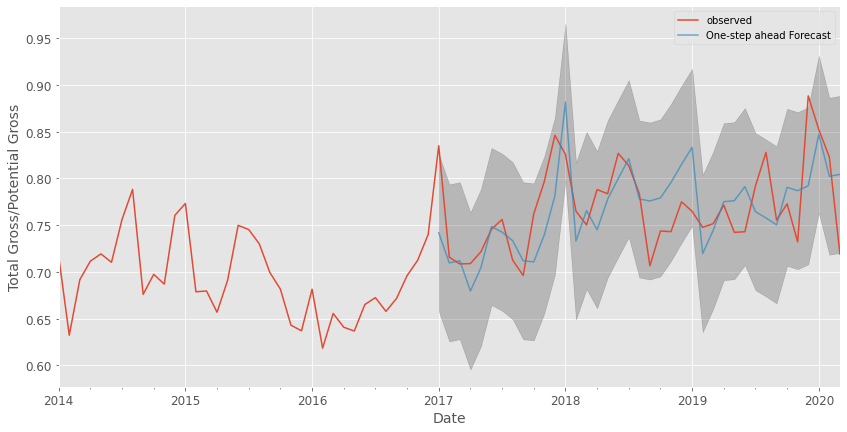

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Gross/Potential Gross')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [18]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
ARIMAF_RMSE = round(np.sqrt(mse), 2)
ARIMAF_RMSE

The Root Mean Squared Error of our forecasts is 0.04


0.04

In [19]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True,full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

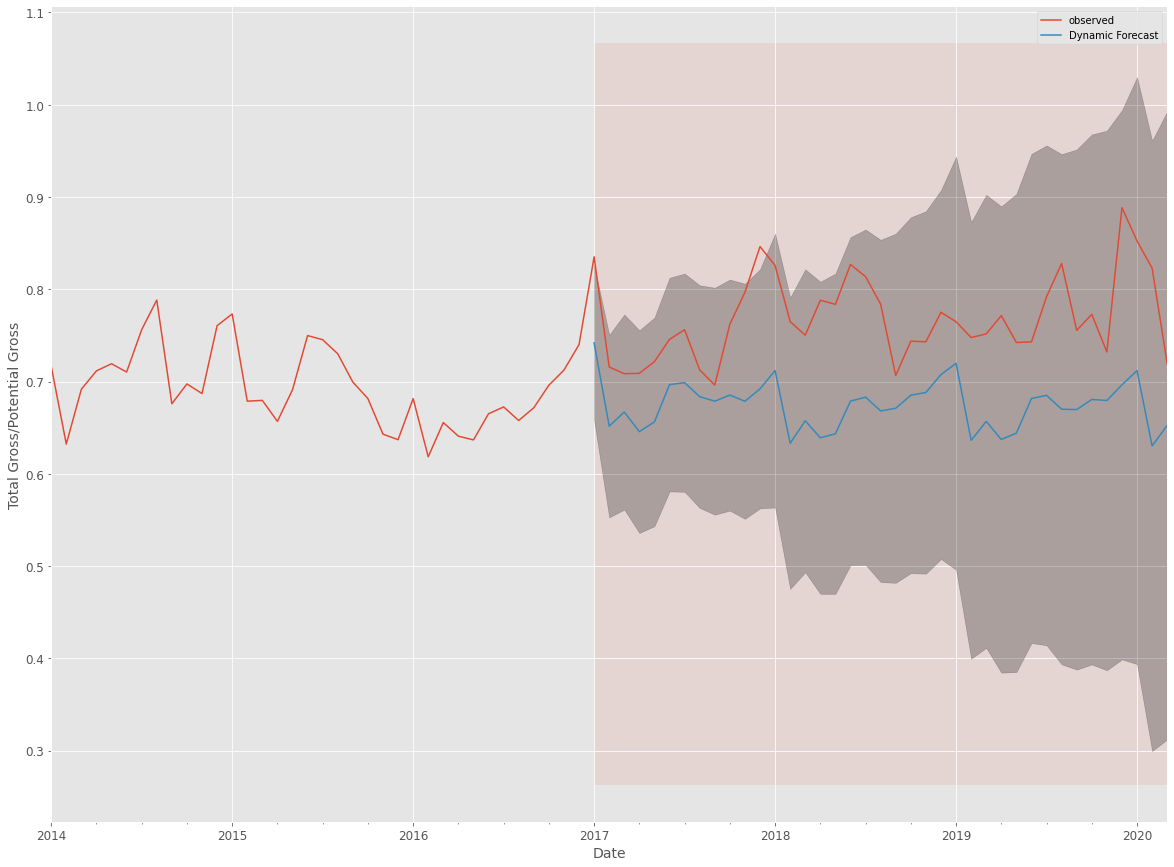

In [20]:
ax = y['2014':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Total Gross/Potential Gross')

plt.legend()
plt.show()

In [21]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [22]:
print('The Root Mean Squared Error of our dyanmic forecasts is {}'.format(round(np.sqrt(mse), 2)))
ARIMADF_RMSE = round(np.sqrt(mse), 2)

The Root Mean Squared Error of our dyanmic forecasts is 0.1


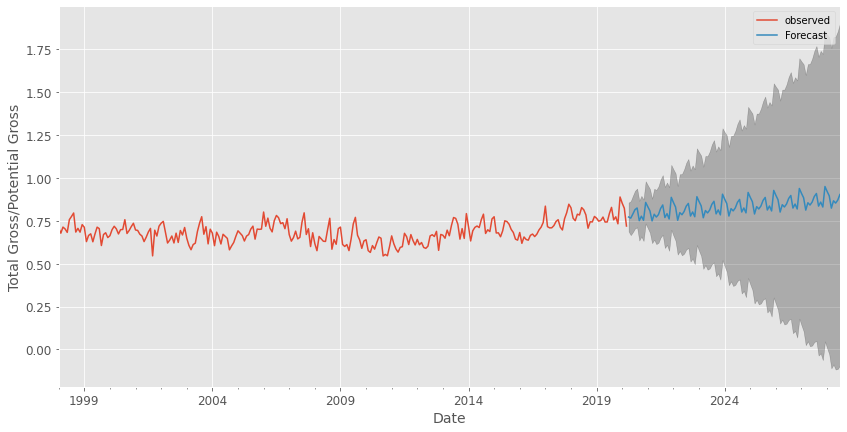

In [23]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Gross/Potential Gross')
plt.legend()
plt.show()

In [24]:
df = gross_data[['avg_ticket_price','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
df2

,month,year,avg_ticket_price
0,1,1986,6856.604414
1,1,1987,5349.268682
2,1,1988,7390.928311
3,1,1989,7563.116309
4,1,1990,5679.396554
...,...,...,...
413,12,2015,13661.215123
414,12,2016,16878.414144
415,12,2017,25069.449142
416,12,2018,28203.041785


In [25]:
!pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 9.3 MB/s 
     |████████████████████████████████| 216 kB 55.8 MB/s 
     |████████████████████████████████| 133 kB 61.6 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.10.2-py3-none-any.whl size=63698 sha256=50216ff4d7767ac9d74c621bf6f6a2bda5fe658ef7f6688ecbbff4af03e8dbac
  Stored in directory: /root/.cache/pip/wheels/c2/ce/09/18307b06c0ea3dd91300fce5c926b36d26248e53b71f576db8
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=2eec413f8b1a3c253e3cadd7cc1af2bfe492fa78772acf70af91685124526607
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dep

In [26]:
from scalecast.Forecaster import Forecaster
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [27]:
f = Forecaster(y=y,
                   current_dates=y.index)

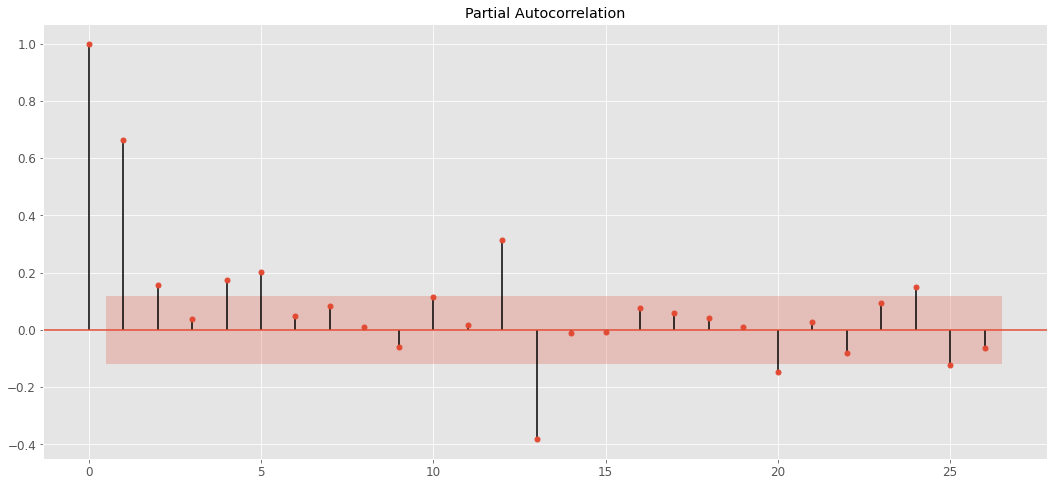

In [28]:
f.plot_pacf(lags=26)
plt.show()

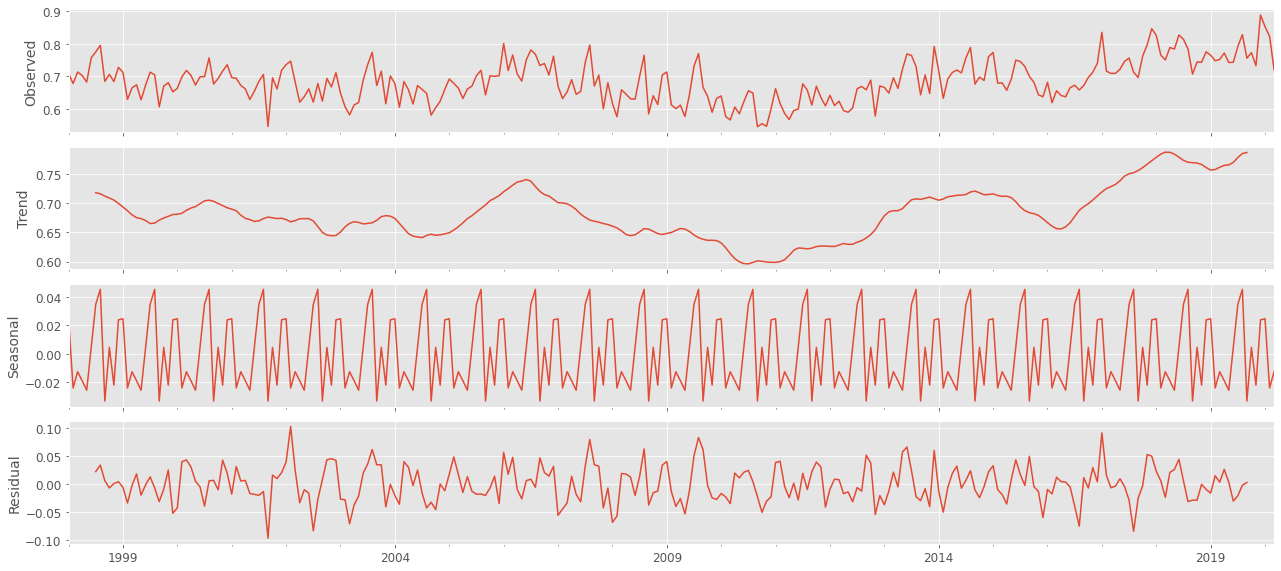

In [29]:
f.seasonal_decompose().plot()
plt.show()

In [30]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat,pval)

-1.8366031714350368 0.36244654323444286


In [31]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural networkf.manual_forecast(call_me='lstm_default')


8/8 [==============================] - 5s 5ms/step - loss: 0.3918


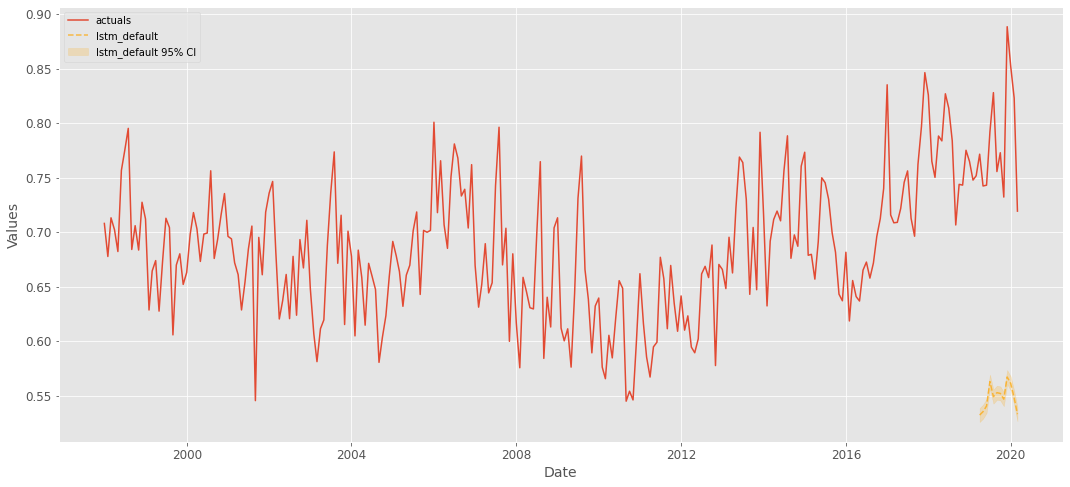

In [32]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

8/8 [==============================] - 6s 17ms/step - loss: 0.3186


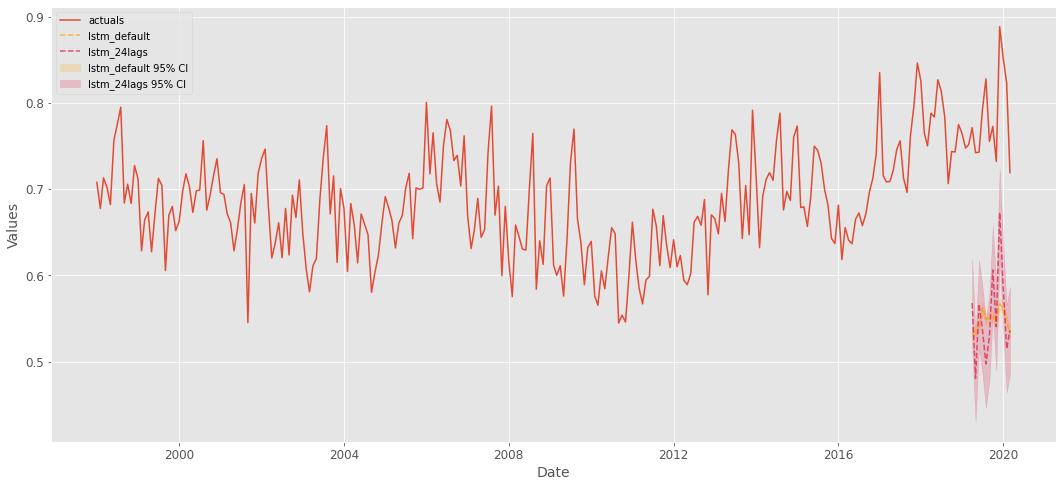

In [33]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
6/6 [==============================] - 5s 131ms/step - loss: 0.4390 - val_loss: 0.3997
Epoch 2/5
6/6 [==============================] - 0s 16ms/step - loss: 0.4115 - val_loss: 0.3716
Epoch 3/5
6/6 [==============================] - 0s 16ms/step - loss: 0.3846 - val_loss: 0.3432
Epoch 4/5
6/6 [==============================] - 0s 16ms/step - loss: 0.3576 - val_loss: 0.3153
Epoch 5/5
6/6 [==============================] - 0s 21ms/step - loss: 0.3314 - val_loss: 0.2892
Epoch 1/5
6/6 [==============================] - 3s 125ms/step - loss: 0.4325 - val_loss: 0.3805
Epoch 2/5
6/6 [==============================] - 0s 17ms/step - loss: 0.4176 - val_loss: 0.3662
Epoch 3/5
6/6 [==============================] - 0s 17ms/step - loss: 0.4034 - val_loss: 0.3523
Epoch 4/5
6/6 [==============================] - 0s 19ms/step - loss: 0.3895 - val_loss: 0.3381
Epoch 5/5
6/6 [==============================] - 0s 17ms/step - loss: 0.3749 - val_loss: 0.3231


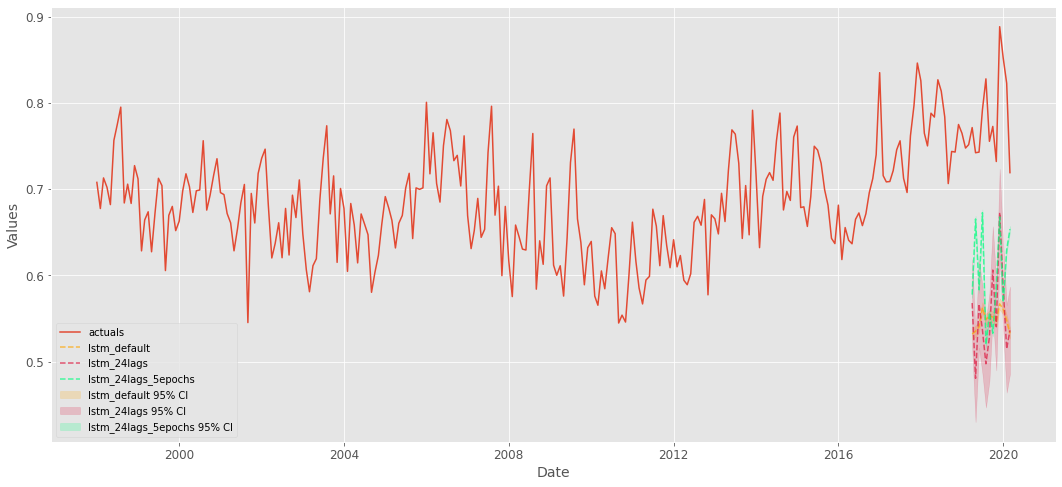

In [34]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
6/6 [==============================] - 8s 321ms/step - loss: 0.4364 - val_loss: 0.3917
Epoch 2/25
6/6 [==============================] - 0s 39ms/step - loss: 0.4000 - val_loss: 0.3474
Epoch 3/25
6/6 [==============================] - 0s 39ms/step - loss: 0.3523 - val_loss: 0.2850
Epoch 4/25
6/6 [==============================] - 0s 41ms/step - loss: 0.2937 - val_loss: 0.2343
Epoch 5/25
6/6 [==============================] - 0s 40ms/step - loss: 0.2476 - val_loss: 0.1887
Epoch 6/25
6/6 [==============================] - 0s 42ms/step - loss: 0.2084 - val_loss: 0.1545
Epoch 7/25
6/6 [==============================] - 0s 42ms/step - loss: 0.1864 - val_loss: 0.1398
Epoch 8/25
6/6 [==============================] - 0s 42ms/step - loss: 0.1756 - val_loss: 0.1295
Epoch 9/25
6/6 [==============================] - 0s 42ms/step - loss: 0.1705 - val_loss: 0.1269
Epoch 10/25
6/6 [==============================] - 0s 39ms/step - loss: 0.1688 - val_loss: 0.1266
Epoch 11/25
6/6 [===========

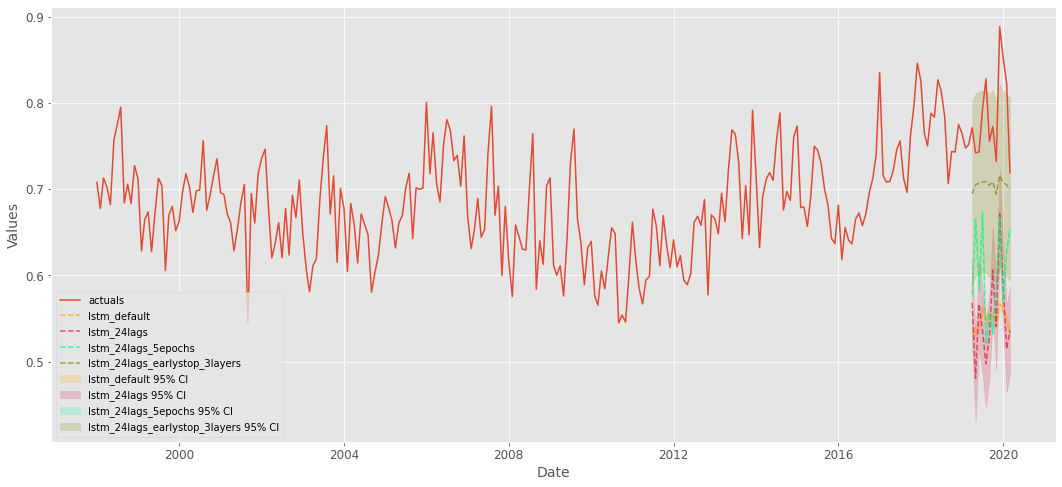

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
6/6 [==============================] - 12s 488ms/step - loss: 0.3931 - val_loss: 0.2341
Epoch 2/15
6/6 [==============================] - 1s 107ms/step - loss: 0.2255 - val_loss: 0.1454
Epoch 3/15
6/6 [==============================] - 1s 105ms/step - loss: 0.1889 - val_loss: 0.1673
Epoch 4/15
6/6 [==============================] - 1s 103ms/step - loss: 0.1895 - val_loss: 0.1372
Epoch 5/15
6/6 [==============================] - 1s 104ms/step - loss: 0.1887 - val_loss: 0.1327
Epoch 6/15
6/6 [==============================] - 1s 106ms/step - loss: 0.1801 - val_loss: 0.1539
Epoch 7/15
6/6 [==============================] - 1s 102ms/step - loss: 0.1786 - val_loss: 0.1289
Epoch 8/15
6/6 [==============================] - 1s 105ms/step - loss: 0.1803 - val_loss: 0.1489
Epoch 9/15
6/6 [==============================] - 1s 101ms/step - loss: 0.1740 - val_loss: 0.1286
Epoch 10/15
6/6 [==============================] - 1s 104ms/step - loss: 0.1726 - val_loss: 0.1382
Epoch 11/15
6/6 [=

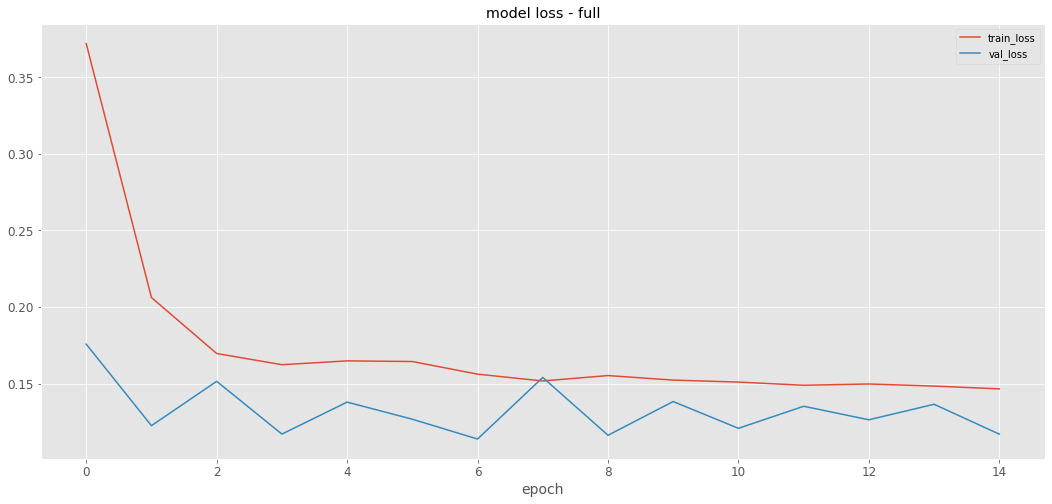

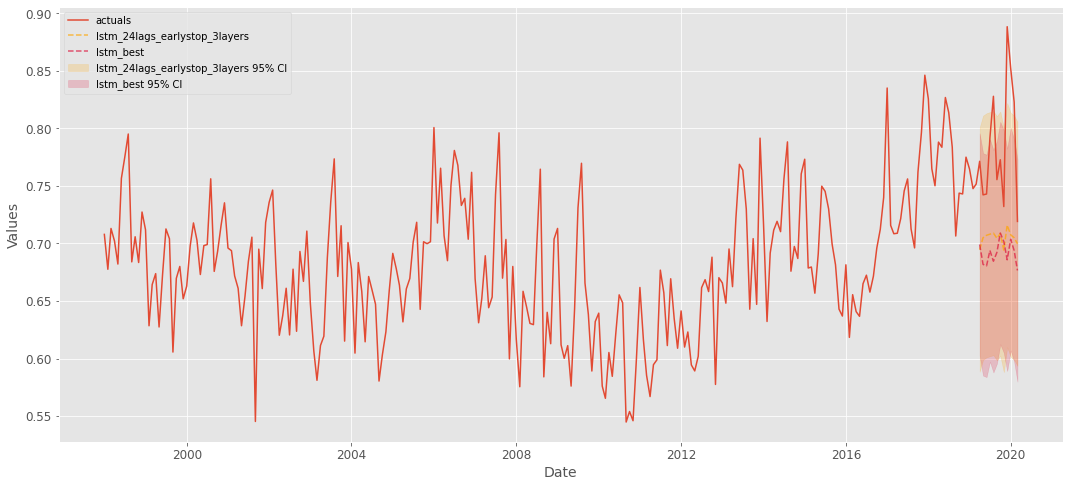

In [36]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [37]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

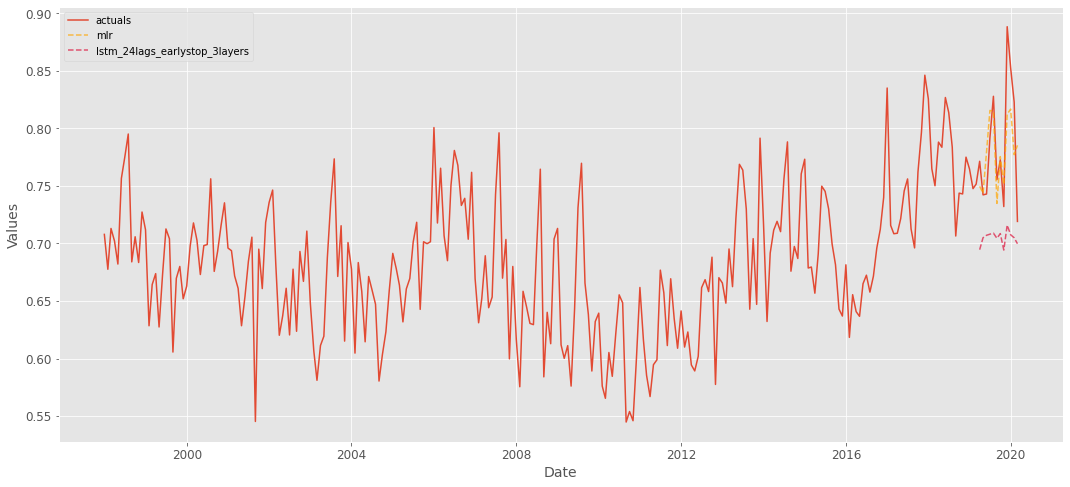

In [38]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

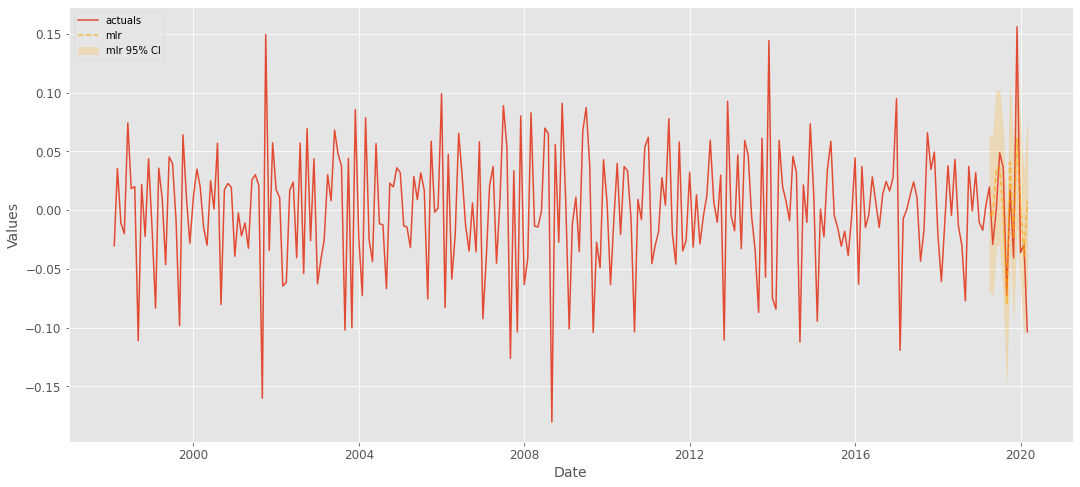

In [39]:
f.plot_test_set(models='mlr',ci=True)

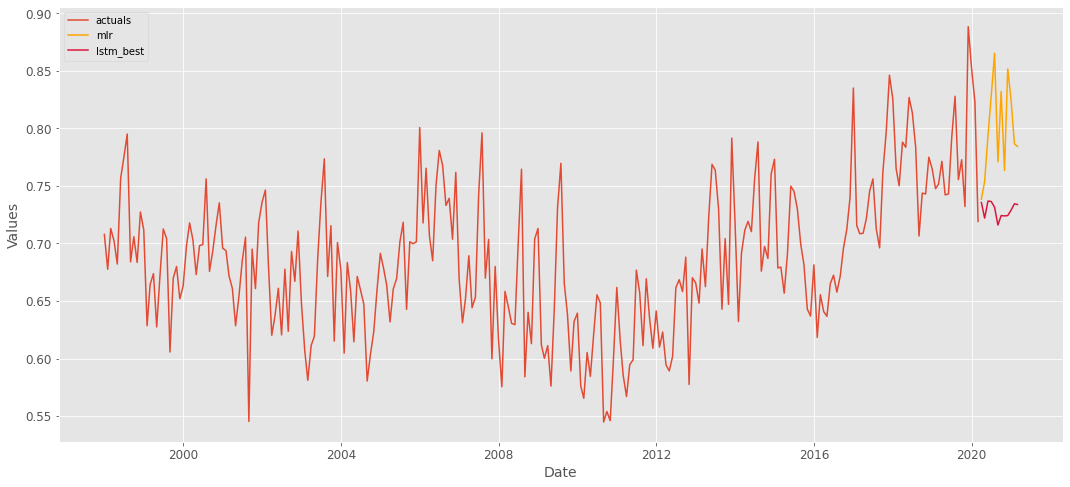

In [40]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

In [41]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.038100,0.037487,0.446832,True
1,lstm_24lags_earlystop_3layers,0.098662,0.092595,-2.374878,False
2,lstm_best,0.115189,0.105492,-3.380484,False
3,lstm_24lags_5epochs,0.230688,0.197125,-14.295677,False
4,lstm_24lags,0.294548,0.237396,-21.183574,False
5,lstm_default,0.299360,0.240529,-21.772967,False


In [42]:
err = f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname','LevelTestSetRMSE']]
MLR_RMSE = err[err['ModelNickname']=='mlr']['LevelTestSetRMSE'][0]
LSTM_RMSE = err[err['ModelNickname']=='lstm_best']['LevelTestSetRMSE']
LSTM_RMSE = LSTM_RMSE[2]
LSTM_RMSE

0.10549188621381787

In [43]:
!pip install pystan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
df = g_data[['T_gross_p_gross','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','T_gross_p_gross']]
#df3.set_index(['date'], inplace = True)
df3


,date,T_gross_p_gross
0,1998-01-01,82.825266
1,1999-01-01,96.823606
2,2000-01-01,93.471525
3,2001-01-01,73.779315
4,2002-01-01,64.011281
...,...,...
262,2015-12-01,70.699472
263,2016-12-01,95.461112
264,2017-12-01,133.710778
265,2018-12-01,150.356496


In [45]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             267 non-null    datetime64[ns]
 1   T_gross_p_gross  267 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


In [46]:
df3 = df3.rename(columns={'date': 'ds',
                        'T_gross_p_gross': 'y'})


In [47]:
from fbprophet import Prophet

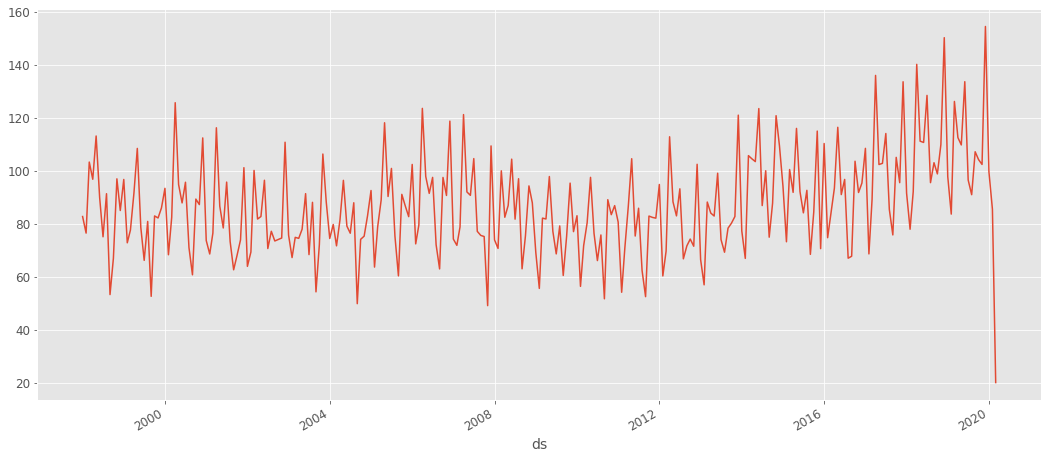

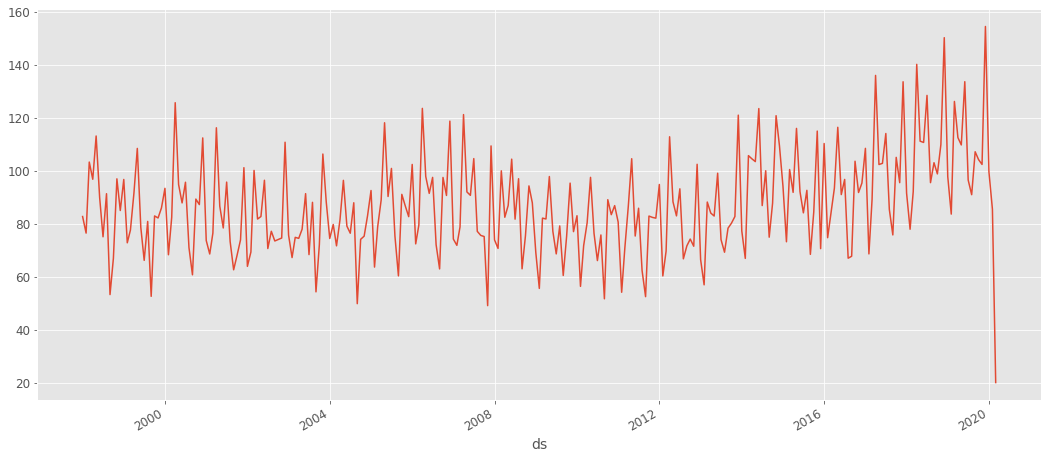

In [48]:
plt.figure()
df3.set_index('ds').y.plot().get_figure()

In [49]:
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df3);
model.weekly_seasonality

False

In [50]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
286,2021-10-31
287,2021-11-30
288,2021-12-31
289,2022-01-31
290,2022-02-28


In [51]:
forecast = model.predict(future)

In [52]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
286,2021-10-31,39.638371,42.570388,74.613524,39.638371,39.638372,18.690190,18.690190,18.690190,10.503432,10.503432,10.503432,8.186758,8.186758,8.186758,0.0,0.0,0.0,58.328562
287,2021-11-30,39.395446,14.792135,46.281439,39.395446,39.395446,-9.313938,-9.313938,-9.313938,-21.226106,-21.226106,-21.226106,11.912169,11.912169,11.912169,0.0,0.0,0.0,30.081508
288,2021-12-31,39.144423,34.520122,68.208104,39.144423,39.144423,12.720354,12.720354,12.720354,10.503432,10.503432,10.503432,2.216921,2.216921,2.216921,0.0,0.0,0.0,51.864777
289,2022-01-31,38.893400,43.580374,75.629913,38.893400,38.893400,21.168538,21.168538,21.168538,35.397555,35.397555,35.397555,-14.229017,-14.229017,-14.229017,0.0,0.0,0.0,60.061938
290,2022-02-28,38.666669,-88.339006,-56.039998,38.666669,38.666670,-111.030565,-111.030565,-111.030565,-122.464340,-122.464340,-122.464340,11.433775,11.433775,11.433775,0.0,0.0,0.0,-72.363896


In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
286,2021-10-31,58.328562,42.570388,74.613524
287,2021-11-30,30.081508,14.792135,46.281439
288,2021-12-31,51.864777,34.520122,68.208104
289,2022-01-31,60.061938,43.580374,75.629913
290,2022-02-28,-72.363896,-88.339006,-56.039998


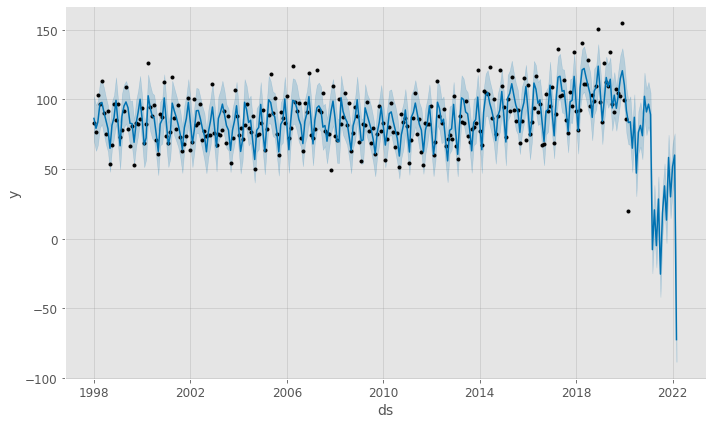

In [54]:
model.plot(forecast);

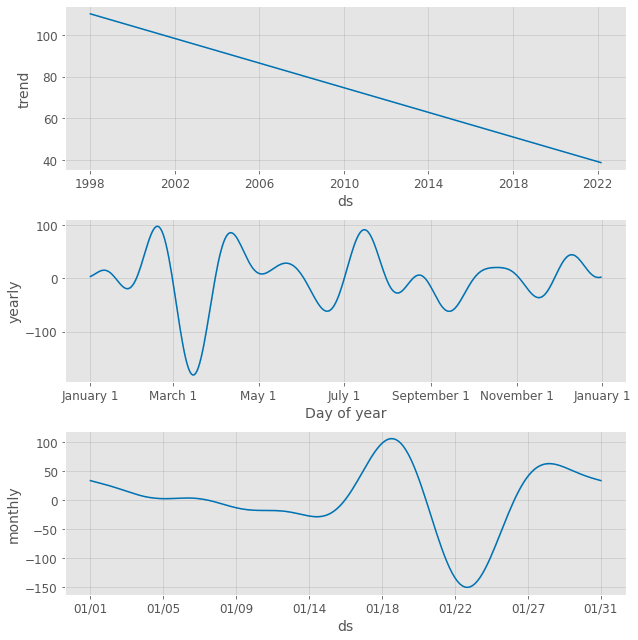

In [55]:
model.plot_components(forecast);

In [56]:
metric_df = forecast.set_index('ds')[['yhat']].join(df3.set_index('ds').y).reset_index()

In [57]:
metric_df.tail()

,ds,yhat,y
286,2021-10-31,58.328562,NaN
287,2021-11-30,30.081508,NaN
288,2021-12-31,51.864777,NaN
289,2022-01-31,60.061938,NaN
290,2022-02-28,-72.363896,NaN


In [58]:
metric_df.dropna(inplace=True)

In [59]:
metric_df.tail()

,ds,yhat,y
262,2019-11-01,115.035088,102.494067
263,2019-12-01,120.579722,154.586943
264,2020-01-01,110.223364,99.726920
265,2020-02-01,91.967029,85.579822
266,2020-03-01,83.361616,20.137123


In [60]:
!pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=03bed1063756f23b688d134f5dc18b21b73c2804b9d4fa2ff1b02158da6af298
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [61]:
import ml_metrics as metrics

In [62]:
prophet_err = metrics.rmse(metric_df.y, metric_df.yhat)

In [63]:
error = pd.DataFrame({'ARIMAF-RMSE':ARIMAF_RMSE,'ARIMADF_RMSE':ARIMADF_RMSE,'lstm_24lags_earlystop_3layers':LSTM_RMSE,'MLR RMSE':MLR_RMSE,'PROPHET RMSE':prophet_err},index=[0])
error

,ARIMAF-RMSE,ARIMADF_RMSE,lstm_24lags_earlystop_3layers,MLR RMSE,PROPHET RMSE
0,0.04,0.1,0.105492,0.037487,12.503776
